# Data management

## Data Visualization: maps with `geopandas`

## [Michel Coppée](https://www.uliege.be/cms/c_9054334/fr/repertoire?uid=u224042) & [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/malkaguillot/ECON2206-Data-Management-2023/HEAD?labpath=%2Fpractice%2F3.4-maps.ipynb)

In [1]:
# pip install folium matplotlib mapclassify  geoplot

**GeoPandas** = pandas + geospatial data
![](https://geopandas.org/en/stable/_images/dataframe.svg)
## Reference : 
- [Getting started](https://geopandas.org/en/stable/getting_started.html) with geopandas
- https://www.practicaldatascience.org/html/gis_what_is_gis.html 


In [2]:
#pip install geopandas

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Vector dataset of all the countries in the world

**Reading `geopandas` files**

## Geographic Information Systems = GIS
= Data that include *geospatial* information
#### 2 types : 
- vector data 
- raster #mainly images



In [4]:
# Load GIS data : 
# (this is a dataset that of countries that comes packaged with geopandas)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
# Inspect.
world.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
141,6.029740e+07,Europe,Italy,ITA,2003576,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46..."
98,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
64,7.813215e+06,Africa,Sierra Leone,SLE,4121,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271..."
165,1.120787e+08,Africa,Ethiopia,ETH,95912,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ..."
77,6.855713e+06,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."


<Axes: >

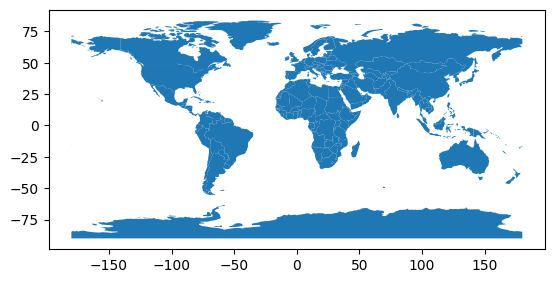

In [6]:
world.plot() # relies on the `geometry`column

<Axes: >

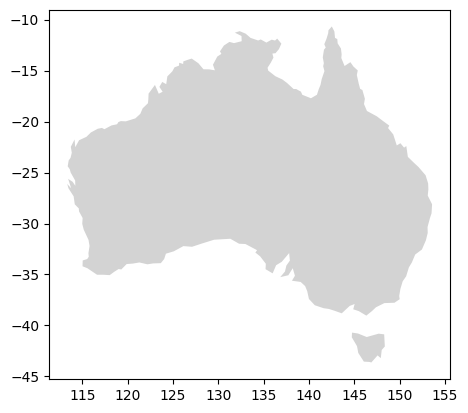

In [7]:
world[world["name"] == "Australia"].plot(color="lightgrey")

#### Measuring area

In [8]:
world["area"] = world.area
world[['name', 'area']].head()

/var/folders/cg/tgk7cwd906x_71j8jdd3gzc00000gn/T/ipykernel_80240/2273292200.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world["area"] = world.area


,name,area
0,Fiji,1.639511
1,Tanzania,76.301964
2,W. Sahara,8.603984
3,Canada,1712.995228
4,United States of America,1122.281921


#### Centroids

In [9]:
world['centroid'] = world.centroid
world[['name', 'centroid']].head()

/var/folders/cg/tgk7cwd906x_71j8jdd3gzc00000gn/T/ipykernel_80240/295270801.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.centroid


,name,centroid
0,Fiji,POINT (163.85316 -17.31631)
1,Tanzania,POINT (34.75299 -6.25773)
2,W. Sahara,POINT (-12.13783 24.29117)
3,Canada,POINT (-98.14238 61.46908)
4,United States of America,POINT (-112.59944 45.70563)


#### Measuring distance

In [10]:
first_point = world['centroid'].iloc[0] # distance to the fiji!
world['distance'] = world['centroid'].distance(first_point)
world[['name', 'distance']].head()

/var/folders/cg/tgk7cwd906x_71j8jdd3gzc00000gn/T/ipykernel_80240/687694950.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['distance'] = world['centroid'].distance(first_point)


,name,distance
0,Fiji,0.000000
1,Tanzania,129.572942
2,W. Sahara,180.842509
3,Canada,273.585093
4,United States of America,283.545067


### Combine data & maps: Choropleth Maps
= maps where the color of each shape is based on the value of an associated variable

/var/folders/cg/tgk7cwd906x_71j8jdd3gzc00000gn/T/ipykernel_80240/3218308724.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world["pop_density"] = np.log(world["pop_est"] / world.area)


<Axes: >

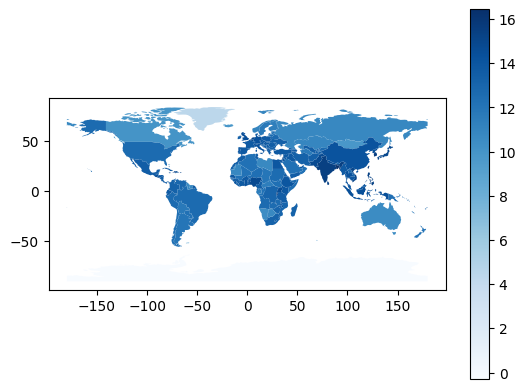

In [11]:
# Make Pop Density and plot
world["pop_density"] = np.log(world["pop_est"] / world.area)
world.plot(column="pop_density", cmap="Blues", legend=True)

/opt/homebrew/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

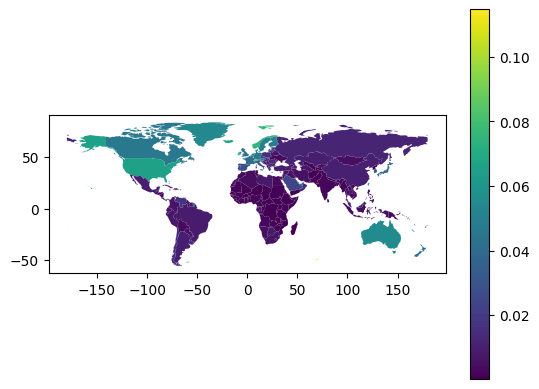

In [12]:
 # Plot by GDP per capita
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap', legend=True)

## Plot geographic data

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/udiy/blogposts/main/Easy%20map/fire_archive_M6_96619.csv",
                 usecols=["latitude", "longitude", "brightness", "acq_date"],
                 parse_dates=["acq_date"])

df.head()

,latitude,longitude,brightness,acq_date
0,-11.8070,142.0583,313.0,2019-08-01
1,-11.7924,142.0850,319.3,2019-08-01
2,-12.8398,132.8744,311.6,2019-08-01
3,-14.4306,143.3035,310.1,2019-08-01
4,-12.4953,131.4897,310.3,2019-08-01


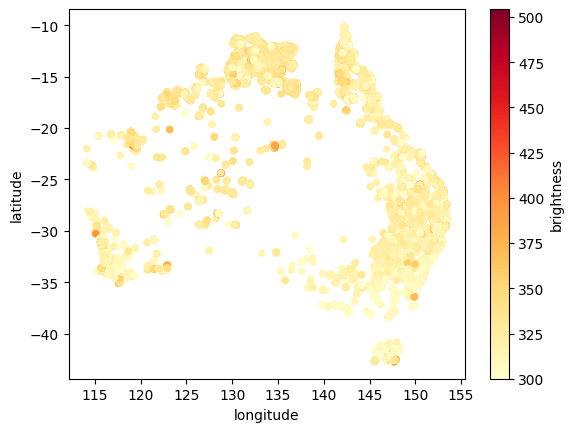

In [14]:
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness", colormap="YlOrRd")
plt.show()

##  Combine scatter plot with Geopandas
### From longitudes and latitudes

In [15]:
# creating a GeoDataFrame = a dataframe with geometry coordinates
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,latitude,longitude,brightness,acq_date,geometry
0,-11.8070,142.0583,313.0,2019-08-01,POINT (142.05830 -11.80700)
1,-11.7924,142.0850,319.3,2019-08-01,POINT (142.08500 -11.79240)
2,-12.8398,132.8744,311.6,2019-08-01,POINT (132.87440 -12.83980)
3,-14.4306,143.3035,310.1,2019-08-01,POINT (143.30350 -14.43060)
4,-12.4953,131.4897,310.3,2019-08-01,POINT (131.48970 -12.49530)


### plot the coordinates over a country-level map


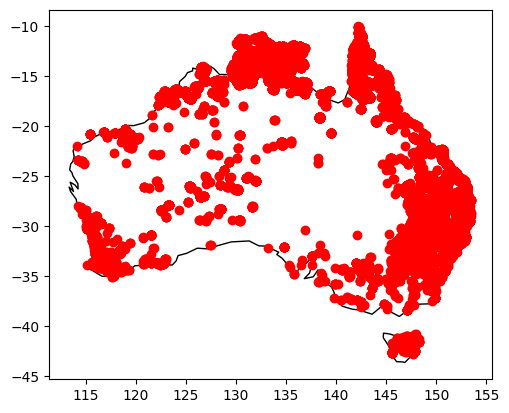

In [16]:
# We restrict to South America.
ax = world[world.name == 'Australia'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

### Costumizing the map

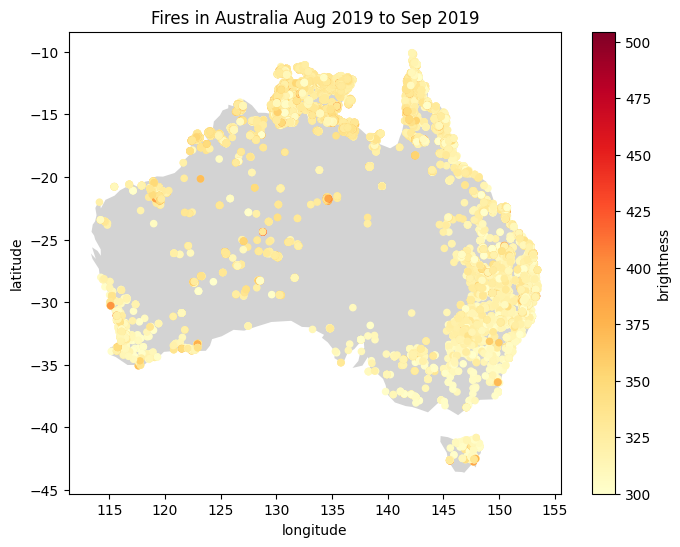

In [17]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world[world["name"] == "Australia"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title
first_month = df["acq_date"].min().strftime("%b %Y")
last_month = df["acq_date"].max().strftime("%b %Y")

# plot points
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness", colormap="YlOrRd", 
        title=f"Fires in Australia {first_month} to {last_month}", ax=ax)

# add grid
#ax.grid(b=True, alpha=0.5)

plt.show()

### Folium map : interactive, based on `Leaflet`

In [18]:
#pip install folium

In [19]:
import folium

In [20]:
# Stamen Terrain = terrain map layer
map = folium.Map(location = [-23.543995, 142.264296], tiles = "Stamen Terrain", zoom_start = 5)
map

In [21]:
# OpenStreetMap
map = folium.Map(location = [23.543995, 142.264296], tiles='OpenStreetMap' , zoom_start = 1)
map

### Density of fires in Australia

In [22]:
from folium import plugins

map = folium.Map(location = [-23.543995, 142.264296], tiles = "Stamen Terrain", zoom_start = 5)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)
map